# Matplotlib

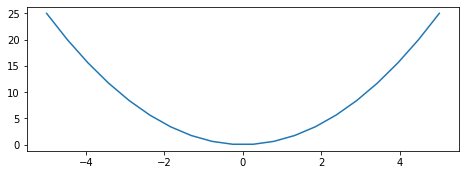

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 20)
y = x ** 2

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 0.5]) 
axes.plot(x, y);


.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

global aaa
aaa = 1

def ploty(uf):
    x = np.linspace(0, 5, uf)
    y = x ** 2

    fig, ax = plt.subplots()

    ax.plot(x, math.pi * x**2, label=r"$y = \pi r^2$", color='red', linewidth=2)
    ax.plot(x, 4.0 / 3 * math.pi * x**3, label=r"$y = \frac{4}{3}\pi r^3$")
    ax.set_xlabel(r'$r$', fontsize=18)
    ax.set_ylabel(r'$y$', fontsize=18)
    ax.set_title('Obsah kruhu a objem koule', family="serif")
    ax.legend(loc=2)    

    plt.show()

1


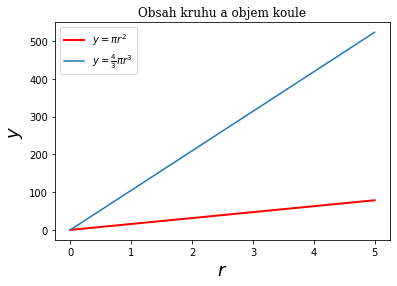

In [3]:
print(aaa)
aaa += 1
ploty(2)

In [4]:
fig.savefig("graf.png")

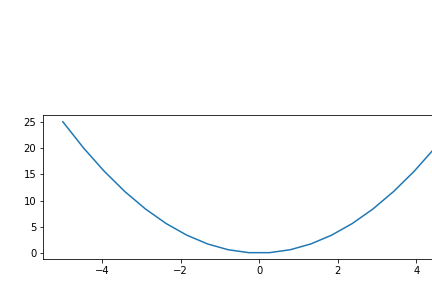

In [5]:
import IPython
IPython.core.display.Image(filename="graf.png")

# Matplotlib animation html

In [18]:
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode('utf-8')
    
    return VIDEO_TAG.format(anim._encoded_video)

In [19]:
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

In [20]:
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# call our new function to display the animation
display_animation(anim)

AttributeError: 'bytes' object has no attribute 'encode'